# There is a wealth of online data sets

For the more business-minded attendees, let's switch briefly from flowers to stocks.

## Example:  grabbing data from the Yahoo finance API

"Yahoo_fin is a Python 3 package designed to scrape historical stock price data, as well as to provide current information on market caps, dividend yields, and which stocks comprise the major exchanges. Additional functionality includes scraping income statements, balance sheets, cash flows, holder information, and analyst data. The package includes the ability to scrape live (real-time) stock prices, capture cryptocurrency data, and get the most actively traded stocks on a current trading day. Yahoo_fin also contains a module for retrieving option prices and expiration dates." 

-- [yahoo_fin documentation](http://theautomatic.net/yahoo_fin-documentation/)

In [1]:
import yahoo_fin.stock_info as si

I will come back to the following libraries later, but include them now for a bit of fun.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets

### Which companies comprise the Dow Jones Industrial Average?

* Use the Yahoo finance API to access the Dow's stock ticker symbols.

In [3]:
dow_list = si.tickers_dow()
dow_list

['AAPL',
 'AXP',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'RTX',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT',
 'XOM']

The Dow is comprised of 30 companies -- check.

We can also access APIs on the web with the requests library.

"Requests is an elegant and simple HTTP library for Python, built for human beings.  Requests allows you to send HTTP/1.1 requests extremely easily." 
<br>-- https://requests.readthedocs.io/en/master/ 

In [4]:
# Getting the actual company name from a ticker symbol
def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    result = requests.get(url).json()
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

In [5]:
get_symbol('MSFT')

'Microsoft Corporation'

In [6]:
for i in dow_list:
    print(i,'\t',get_symbol(i))

AAPL 	 Apple Inc.
AXP 	 American Express Company
BA 	 The Boeing Company
CAT 	 Caterpillar Inc.
CSCO 	 Cisco Systems, Inc.
CVX 	 Chevron Corporation
DIS 	 The Walt Disney Company
DOW 	 Dow Inc.
GS 	 The Goldman Sachs Group, Inc.
HD 	 The Home Depot, Inc.
IBM 	 International Business Machines Corporation
INTC 	 Intel Corporation
JNJ 	 Johnson & Johnson
JPM 	 JPMorgan Chase & Co.
KO 	 The Coca-Cola Company
MCD 	 McDonald's Corporation
MMM 	 3M Company
MRK 	 Merck & Co., Inc.
MSFT 	 Microsoft Corporation
NKE 	 NIKE, Inc.
PFE 	 Pfizer Inc.
PG 	 The Procter & Gamble Company
RTX 	 Raytheon Technologies Corporation
TRV 	 The Travelers Companies, Inc.
UNH 	 UnitedHealth Group Incorporated
V 	 Visa Inc.
VZ 	 Verizon Communications Inc.
WBA 	 Walgreens Boots Alliance, Inc.
WMT 	 Walmart Inc.
XOM 	 Exxon Mobil Corporation


### What is the historical value of DJIA stocks over 2020 to date?

In [7]:
few_days = si.get_data('aapl', start_date = '01/01/2020', end_date = '08/17/2020')

In [8]:
type(few_days)

pandas.core.frame.DataFrame

In [9]:
get_symbol('AAPL')

'Apple Inc.'

In [10]:
few_days.head()

,open,high,low,close,adjclose,volume,ticker
2020-01-02,296.239990,300.600006,295.190002,300.350006,298.292145,33870100,AAPL
2020-01-03,297.149994,300.579987,296.500000,297.429993,295.392120,36580700,AAPL
2020-01-06,293.790009,299.959991,292.750000,299.799988,297.745880,29596800,AAPL
2020-01-07,299.839996,300.899994,297.480011,298.390015,296.345581,27218000,AAPL
2020-01-08,297.160004,304.440002,297.160004,303.190002,301.112640,33019800,AAPL


It's easy to plot with Pandas.

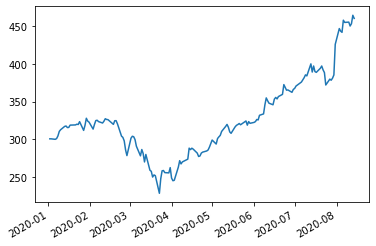

In [23]:
few_days['high'].plot();

For more customization, Pandas uses matplotlib as a base library.

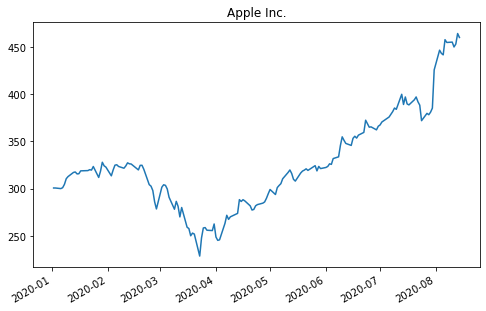

In [31]:
fig,ax = plt.subplots(figsize=(8,5))
ax = few_days['high'].plot()
ax.set_title(get_symbol('AAPL'))
fig.show()

In [34]:
def plotstock(ticker='AAPL'):
    few_days = si.get_data(ticker, start_date = '01/01/2020', end_date = '08/17/2020')
    fig,ax = plt.subplots(figsize=(8,5))
    ax = few_days['high'].plot()
    ax.set_title(get_symbol(ticker))
    fig.show()
    
ipywidgets.interact(plotstock,ticker=dow_list);

interactive(children=(Dropdown(description='ticker', options=('AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS'…

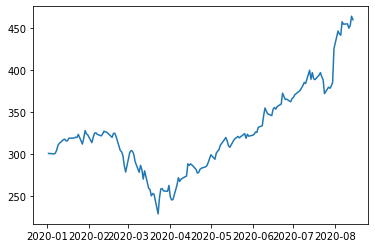

In [11]:
plt.plot(few_days.index,few_days.high)

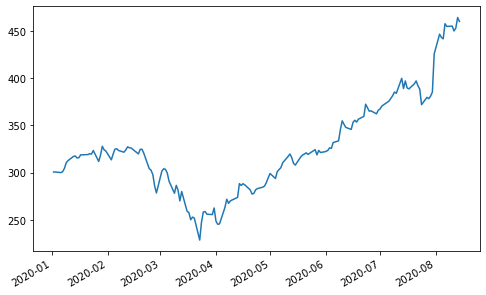

In [13]:
fig,ax = plt.subplots(figsize=(8,5))
plt.plot(few_days.index,few_days.high)
fig.autofmt_xdate()

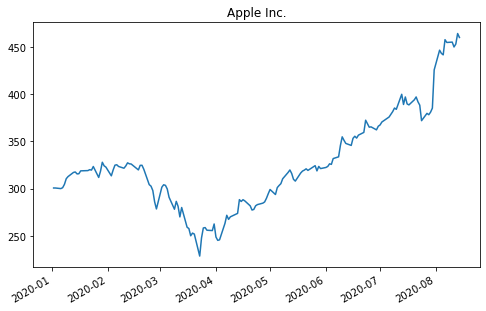

In [14]:
fig,ax = plt.subplots(figsize=(8,5))
plt.plot(few_days.index,few_days.high)
ax.set_title(get_symbol('AAPL'))
fig.autofmt_xdate()

In [19]:
def plotstock(ticker='AAPL'):
    few_days = si.get_data(ticker, start_date = '01/01/2020', end_date = '08/17/2020')
    fig,ax = plt.subplots(figsize=(8,5))
    plt.plot(few_days.index,few_days.high)
    ax.set_title(get_symbol(ticker))
    fig.autofmt_xdate()
    
ipywidgets.interact(plotstock,ticker=dow_list);

interactive(children=(Dropdown(description='ticker', options=('AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS'…

### Apple is one of these companies: Who are the largest holders of Apple stock (by percentage)?

In [7]:
apple_holders = si.get_holders('aapl')
apple_holders.keys()

dict_keys(['Major Holders', 'Direct Holders (Forms 3 and 4)', 'Top Institutional Holders'])

The API returns a dictionary that includes pandas dataframes.

In [11]:
print(type(apple_holders))
print(type(apple_holders['Major Holders']))

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
apple_holders['Major Holders']

,0.07%,% of Shares Held by All Insider
0,62.12%,% of Shares Held by Institutions
1,62.16%,% of Float Held by Institutions
2,4296,Number of Institutions Holding Shares


In [13]:
apple_holders['Direct Holders (Forms 3 and 4)']

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",328990250,"Jun 29, 2020",7.69%,120015643200
1,Blackrock Inc.,275456012,"Jun 29, 2020",6.44%,100486353177
2,"Berkshire Hathaway, Inc",245155566,"Jun 29, 2020",5.73%,89432750476
3,State Street Corporation,177264368,"Jun 29, 2020",4.15%,64666041446
4,"FMR, LLC",95825047,"Jun 29, 2020",2.24%,34956977145
5,"Geode Capital Management, LLC",62923854,"Jun 29, 2020",1.47%,22954621939
6,Price (T.Rowe) Associates Inc,58271885,"Jun 29, 2020",1.36%,21257583648
7,Northern Trust Corporation,53536023,"Jun 29, 2020",1.25%,19529941190
8,Norges Bank Investment Management,46856273,"Dec 30, 2019",1.10%,13759344566
9,Bank Of New York Mellon Corporation,42804896,"Jun 29, 2020",1.00%,15615226060


In [14]:
apple_holders['Top Institutional Holders']

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,117298701,"Mar 30, 2020",2.74%,29827886677
1,Vanguard 500 Index Fund,85980468,"Mar 30, 2020",2.01%,21863973207
2,SPDR S&P 500 ETF Trust,44553380,"May 30, 2020",1.04%,14165301637
3,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",38712448,"May 30, 2020",0.91%,12308235717
4,Vanguard Institutional Index Fund-Institutiona...,36959990,"Mar 30, 2020",0.86%,9398555857
5,Fidelity 500 Index Fund,36919886,"May 30, 2020",0.86%,11738308554
6,iShares Core S&P 500 ETF,31473783,"Apr 29, 2020",0.74%,9246997445
7,Vanguard Growth Index Fund,30336895,"Mar 30, 2020",0.71%,7714369029
8,Vanguard Information Technology Index Fund,19861441,"May 30, 2020",0.46%,6314746551
9,Select Sector SPDR Fund-Technology,18642268,"May 30, 2020",0.44%,5927122687


### Do these holders own stock in other DJIA companies?

First, let's look just at the Vanguard Group, Inc.

In [11]:
comp = []
for i in dow_list:
    comp.append(get_symbol(i))
compdf = pd.DataFrame({'Company':comp})
compdf

,Company
0,Apple Inc.
1,American Express Company
2,The Boeing Company
3,Caterpillar Inc.
4,"Cisco Systems, Inc."
5,Chevron Corporation
6,The Walt Disney Company
7,Dow Inc.
8,"The Goldman Sachs Group, Inc."
9,"The Home Depot, Inc."


In [12]:
icomp = 'Vanguard Group, Inc. (The)'
compdf[icomp] = 0

for i in dow_list:

    gh = si.get_holders(i)
    compdf.loc[compdf['Company']==get_symbol(i),icomp] = 0.00
    
    if 'Direct Holders (Forms 3 and 4)' in gh.keys():
        if icomp in gh['Direct Holders (Forms 3 and 4)'].values:
            ghdf = gh['Direct Holders (Forms 3 and 4)']
            compdf.loc[compdf['Company']==get_symbol(i),icomp] = float(
                ghdf[ghdf['Holder']==icomp]['% Out'].iloc[0].replace('%',''))

compdf

,Company,"Vanguard Group, Inc. (The)"
0,Apple Inc.,7.69
1,American Express Company,6.04
2,The Boeing Company,7.40
3,Caterpillar Inc.,8.67
4,"Cisco Systems, Inc.",8.03
5,Chevron Corporation,0.00
6,The Walt Disney Company,8.22
7,Dow Inc.,8.27
8,"The Goldman Sachs Group, Inc.",7.33
9,"The Home Depot, Inc.",8.51


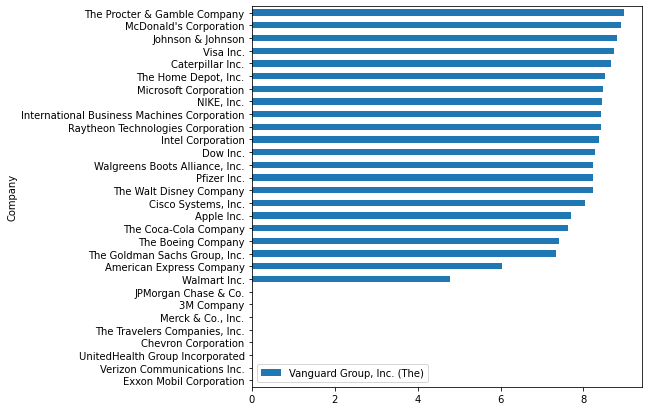

In [13]:
compdf.sort_values('Vanguard Group, Inc. (The)').plot.barh(x='Company',y='Vanguard Group, Inc. (The)',figsize=(7,7));

The top 6 holders of Apple:

In [14]:
top6 = apple_holders['Direct Holders (Forms 3 and 4)'].iloc[:6]['Holder'].values[:6]
top6

array(['Vanguard Group, Inc. (The)', 'Blackrock Inc.',
       'Berkshire Hathaway, Inc', 'State Street Corporation',
       'Advisor Group, Inc.', 'FMR, LLC'], dtype=object)

In [15]:
for h in top6:
    compdf[h] = 0
    
for i in dow_list:
    gh = si.get_holders(i)
    if 'Direct Holders (Forms 3 and 4)' in gh.keys():
        compname = get_symbol(i)
        for h in top6:            
            if h in gh['Direct Holders (Forms 3 and 4)'].values:
                ghdf = gh['Direct Holders (Forms 3 and 4)']
                compdf.loc[compdf['Company']==compname,h] = float(
                    ghdf[ghdf['Holder']==h]['% Out'].iloc[0].replace('%',''))

In [16]:
compdf

,Company,"Vanguard Group, Inc. (The)",Blackrock Inc.,"Berkshire Hathaway, Inc",State Street Corporation,"Advisor Group, Inc.","FMR, LLC"
0,Apple Inc.,7.88,6.42,5.73,4.22,2.73,2.18
1,American Express Company,6.26,5.33,18.83,4.23,0.00,2.38
2,The Boeing Company,7.40,5.89,0.00,4.63,0.00,0.00
3,Caterpillar Inc.,9.26,6.43,0.00,8.22,0.00,0.00
4,"Cisco Systems, Inc.",8.58,7.65,0.00,4.40,0.00,0.00
5,Chevron Corporation,0.00,0.00,0.00,0.00,0.00,0.00
6,The Walt Disney Company,7.63,6.34,0.00,4.15,0.00,1.30
7,Dow Inc.,8.37,6.15,0.00,4.86,0.00,0.00
8,"The Goldman Sachs Group, Inc.",7.44,5.70,0.00,5.75,0.00,0.00
9,"The Home Depot, Inc.",7.98,6.67,0.00,4.83,0.00,1.73


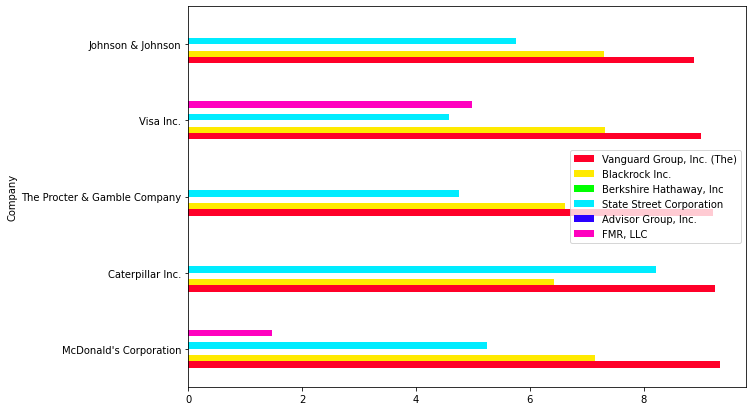

In [17]:
compdf.sort_values('Vanguard Group, Inc. (The)',ascending=False)[:5].plot.barh(x='Company',figsize=(10,7),cmap='gist_rainbow')

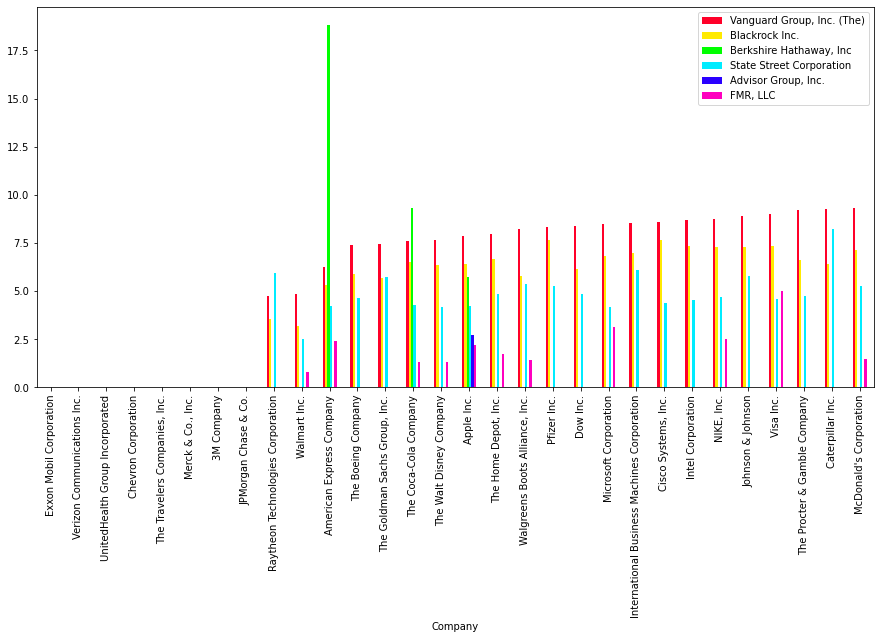

In [18]:
compdf.sort_values('Vanguard Group, Inc. (The)').plot.bar(x='Company',
                figsize=(15,7),
                cmap='gist_rainbow')

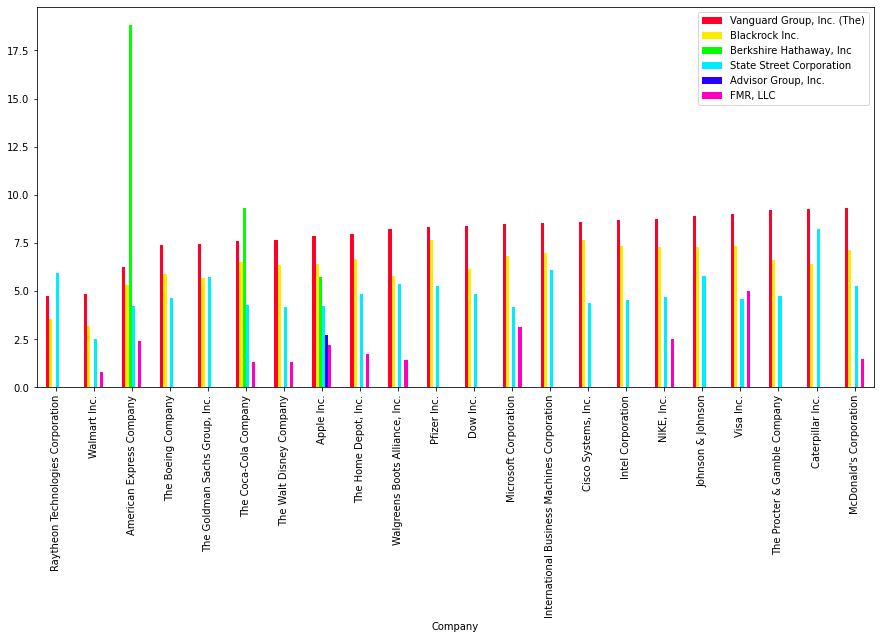

In [19]:
compdf.sort_values('Vanguard Group, Inc. (The)')[8:].plot.bar(x='Company',
                figsize=(15,7),
                cmap='gist_rainbow')

### We could branch off and ask other questions.... but... 
### What is the historical value of DJIA stocks over 2020 to date?

In [15]:
few_days = si.get_data('aapl', start_date = '01/01/2020', end_date = '08/12/2020')

In [16]:
type(few_days)

pandas.core.frame.DataFrame

In [17]:
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [18]:
get_symbol('AAPL')

'Apple Inc.'

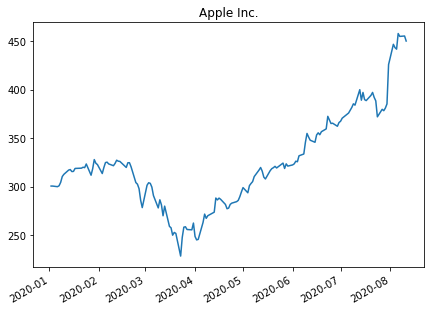

In [24]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(few_days.index, few_days.high)
ax.set_title(get_symbol('AAPL'))
fig.autofmt_xdate()

In [25]:
def plotdows(ticker='AAPL'):
    few_days = si.get_data(ticker, start_date = '01/01/2020', end_date = '08/12/2020')
    fig,ax = plt.subplots(1,1,figsize=(7,5))
    ax.plot(few_days.index, few_days.high)
    ax.set_title(get_symbol(ticker))
    fig.autofmt_xdate()
    
ipywidgets.interactive(plotdows,ticker=dow_list)

interactive(children=(Dropdown(description='ticker', options=('AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS'…